Go to google image search and search each city buildings and keep scrolling till you get option laod more

In Google Chrome press CtrlShiftj on Windows/Linux and CmdOptj on macOS, and a small window the javascript 'Console' will appear. In Firefox press CtrlShiftk on Windows/Linux or CmdOptk on macOS. That is where you will paste the JavaScript commands.
Type the below javascript code in console and check the csv you delete the blanks rows.

urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

In [ ]:
from fastai.vision import *

In [2]:

folder = 'BLR'
file = 'bengaluru_url2.csv'




In [3]:
folder = 'DLI'
file = 'delhi_url2.csv'


In [4]:
folder = 'MUM'
file = 'mumbai_url2.csv'

In [5]:
path = Path('C:/Kaggle/fastai')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [6]:
dest

WindowsPath('C:/Kaggle/fastai/MUM')

In [7]:
path.ls()

[WindowsPath('C:/Kaggle/fastai/bengaluru_url2.csv'),
 WindowsPath('C:/Kaggle/fastai/BLR'),
 WindowsPath('C:/Kaggle/fastai/delhi_url2.csv'),
 WindowsPath('C:/Kaggle/fastai/DLI'),
 WindowsPath('C:/Kaggle/fastai/models'),
 WindowsPath('C:/Kaggle/fastai/MUM'),
 WindowsPath('C:/Kaggle/fastai/mumbai_url2.csv')]

In [8]:
classes=['BLR','DLI','MUM']

In [9]:
download_images(path/file, dest)

In [10]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [11]:
data.classes


['BLR', 'DLI', 'MUM']

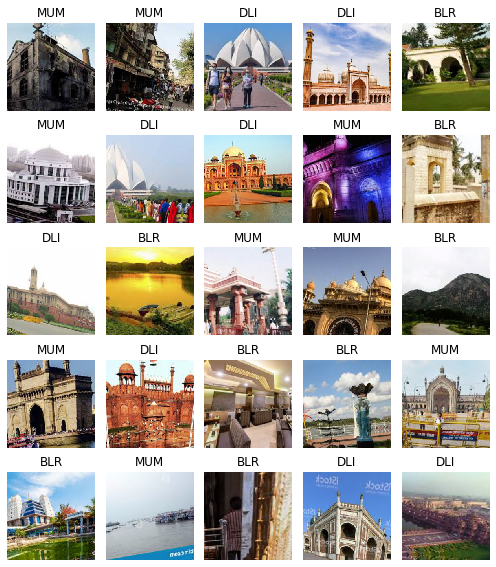

In [12]:
data.show_batch(rows=5, figsize=(7,8))

In [13]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['BLR', 'DLI', 'MUM'], 3, 768, 192)

In [14]:

learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [24]:
learn.fit_one_cycle(20)

epoch,train_loss,valid_loss,error_rate,time
0,0.093393,1.138002,0.359375,00:36
1,0.079342,1.155542,0.338542,00:36
2,0.074912,1.349469,0.375000,00:36
3,0.076126,1.270432,0.333333,00:36
4,0.074902,1.933906,0.432292,00:36
5,0.120610,2.594415,0.453125,00:36
6,0.248870,1.871565,0.442708,00:36
7,0.325348,1.844609,0.437500,00:36
8,0.322054,1.223908,0.364583,00:36
9,0.284813,1.161882,0.385417,00:36


In [25]:
learn.save('stage-1')

In [26]:
learn.unfreeze()


In [29]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


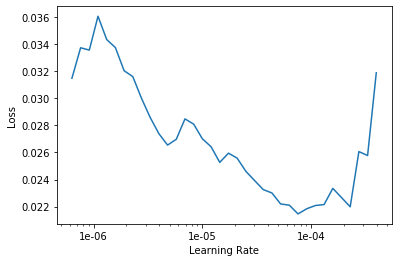

In [30]:
learn.recorder.plot()

In [31]:
learn.fit_one_cycle(4, max_lr=1e-04)

epoch,train_loss,valid_loss,error_rate,time
0,0.023157,1.357961,0.333333,00:36
1,0.042655,1.440452,0.333333,00:36
2,0.034989,1.487965,0.322917,00:36
3,0.036125,1.546011,0.333333,00:36


In [32]:
learn.save('stage-2')


In [33]:
interp = ClassificationInterpretation.from_learner(learn)

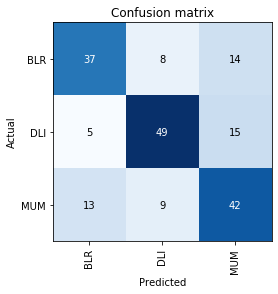

In [34]:
interp.plot_confusion_matrix()

In [35]:
learn.export()

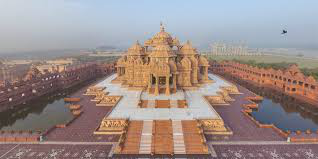

In [37]:

img = open_image('C:/Kaggle/try1.jpg')
img

In [38]:
learn = load_learner(path)

In [39]:

pred =learn.predict(img)


In [40]:
import pandas as pd

In [41]:
pred_df = pd.DataFrame(pred)

In [42]:
pred_df.iloc[:1,]

,0
0,DLI


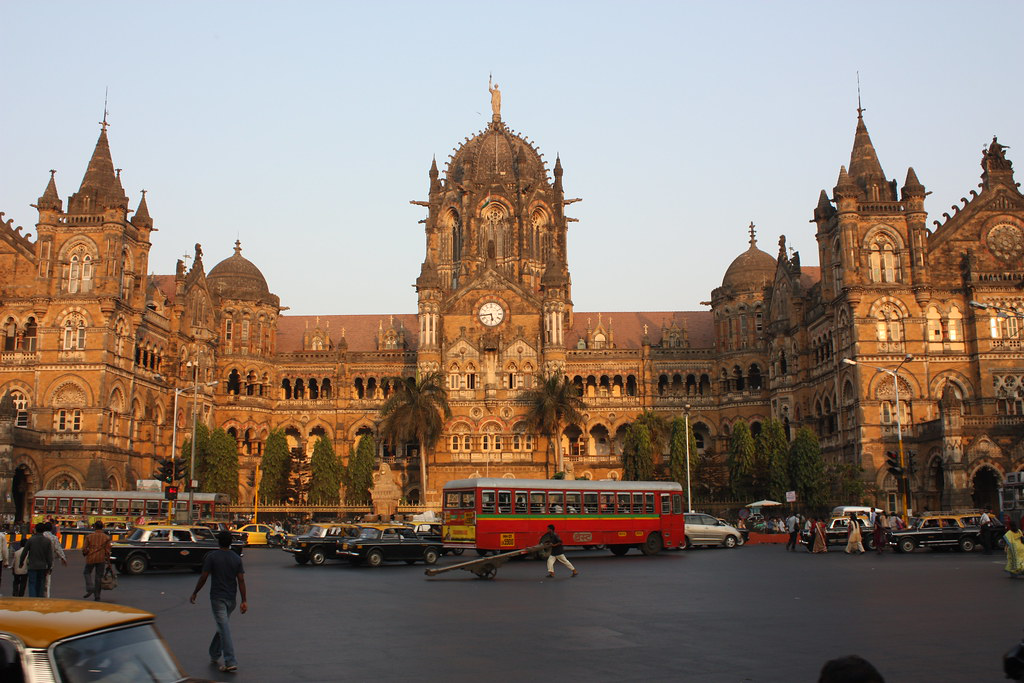

In [55]:

img2 = open_image('C:/Kaggle/try2.jpg')
img2

from fastai.widgets import *

ImageCleaner(ds, idxs, path)
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)


In [56]:
pred2 =learn.predict(img2)

C:\Users\91988\Anacondanew\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


In [57]:
pred_df2 = pd.DataFrame(pred2)

In [58]:
pred_df2.iloc[:1,]

,0
0,MUM


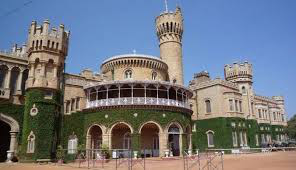

In [59]:

img3 = open_image('C:/Kaggle/try3.jpg')
img3

In [60]:
pred3 =learn.predict(img3)

In [61]:
pred_df3 = pd.DataFrame(pred3)
pred_df3.iloc[:1,]

,0
0,BLR
